In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_NW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,NaN,NaN,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,NaN,8.0,1.0,3.0,4.0,3.0,NaN,1.0
4,4.0,1.0,1.0,3.0,NaN,1.0,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,NaN,1.0,2.0,1.0,2.0,1.0,NaN
679,2.0,NaN,1.0,1.0,2.0,1.0,3.0,1.0,1.0
680,5.0,10.0,NaN,10.0,4.0,NaN,5.0,6.0,3.0
681,1.0,1.0,1.0,3.0,2.0,1.0,NaN,1.0,1.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	48
float64		column 2	64
float64		column 3	48
float64		column 4	66
float64		column 5	98
float64		column 6	48
float64		column 7	80
float64		column 8	66
float64		column 9	66


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,635.000000,619.000000,635.000000,617.000000,585.000000,635.000000,603.000000,617.000000,617.000000
mean,4.429921,3.056543,3.204724,2.698541,3.181197,3.502362,3.353234,2.784441,1.512156
std,2.785619,2.979167,2.946255,2.730280,2.128892,3.607464,2.353255,2.987075,1.572986
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.000000,5.000000,3.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

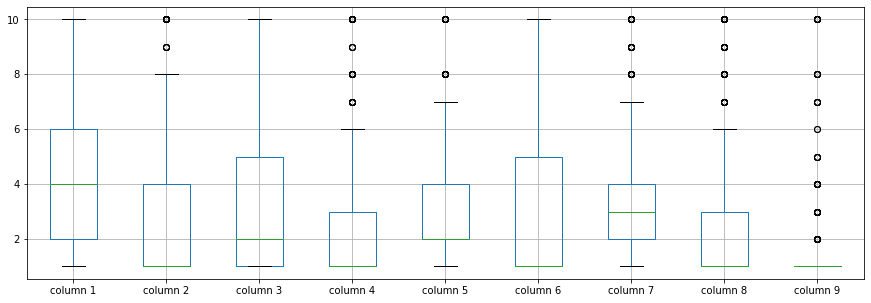

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.429921
column 2    3.056543
column 3    3.204724
column 4    2.698541
column 5    3.181197
column 6    3.502362
column 7    3.353234
column 8    2.784441
column 9    1.512156
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.603893,0.627892,0.464009,0.483602,0.583419,0.506409,0.503294,0.319675
column 2,0.603893,1.000000,0.896407,0.694868,0.741519,0.701999,0.725792,0.681517,0.420478
column 3,0.627892,0.896407,1.000000,0.641714,0.692816,0.723687,0.715104,0.688794,0.390333
column 4,0.464009,0.694868,0.641714,1.000000,0.574066,0.642939,0.656609,0.612327,0.316543
column 5,0.483602,0.741519,0.692816,0.574066,1.000000,0.569469,0.577244,0.643459,0.421605
column 6,0.583419,0.701999,0.723687,0.642939,0.569469,1.000000,0.673155,0.585235,0.276571
column 7,0.506409,0.725792,0.715104,0.656609,0.577244,0.673155,1.000000,0.651445,0.292597
column 8,0.503294,0.681517,0.688794,0.612327,0.643459,0.585235,0.651445,1.000000,0.418180
column 9,0.319675,0.420478,0.390333,0.316543,0.421605,0.276571,0.292597,0.418180,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+76,9+76+76,9+76+76,9+76+76+76+76,9+76+76+76+76+76,9+76+76+76+76+76+76,9+76+76+76+76+76,9+76+76+76+76,9+76+76+76,9+76+76,9+76,9], vae_layer = False, seed = 760)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 32.63640935080392
Epoch: 1 , loss: 32.084313937595915
Epoch: 2 , loss: 29.3402620497204
Epoch: 3 , loss: 27.509035292125883
Epoch: 4 , loss: 27.26898965381441
Epoch: 5 , loss: 27.258371171497163
Epoch: 6 , loss: 27.068229493640718
Epoch: 7 , loss: 27.01360071273077
Epoch: 8 , loss: 27.36361076718285
Epoch: 9 , loss: 26.80383098693121
Epoch: 10 , loss: 26.3714633669172
Epoch: 11 , loss: 26.169369425092423
Epoch: 12 , loss: 26.491621539706276
Epoch: 13 , loss: 25.60141472589402
Epoch: 14 , loss: 26.162965274992445
Epoch: 15 , loss: 25.559300604320708
Epoch: 16 , loss: 26.205320471809024
Epoch: 17 , loss: 25.515252408527193
Epoch: 18 , loss: 25.74810318719773
Epoch: 19 , loss: 25.709284782409668
Epoch: 20 , loss: 25.6507994333903
Epoch: 21 , loss: 25.542743978046236
Epoch: 22 , loss: 25.358282157352992
Epoch: 23 , loss: 24.84823260988508
Epoch: 24 , loss: 24.954815637497674
Epoch: 25 , loss: 25.12242371695

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.000000
column 2    1.000000
column 3    1.256486
column 4    1.000000
column 5    2.000000
column 6    1.000000
column 7    2.000000
column 8    1.000000
column 9    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.000000,3.831792,2.596748,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,-4.907411,0.000000,0.000000,0.000000,0.000000,0.000000,-4.262038,0.000000
4,0.0,0.000000,0.000000,0.000000,-0.757757,0.000000,-1.713095,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
678,0.0,0.000000,-0.280720,0.000000,0.000000,0.000000,0.000000,0.000000,-0.688337
679,0.0,0.781538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
680,0.0,0.000000,-6.759657,0.000000,0.000000,-6.373713,0.000000,0.000000,0.000000
681,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.361535,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(87.62396254444668, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.2613080653901348

In [18]:
new_df.iloc[66,:]

column 1    3.468429
column 2    3.000000
column 3    3.000000
column 4    2.000000
column 5    2.000000
column 6    1.000000
column 7    7.000000
column 8    2.000000
column 9    1.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
1,5.0,4.000000,4.000000,8.831792,9.596748,10.000000,3.000000,2.000000,1.000000
2,3.0,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000
3,6.0,3.092589,8.000000,1.000000,3.000000,4.000000,3.000000,2.737962,1.000000
4,4.0,1.000000,1.000000,3.000000,1.242243,1.000000,1.286905,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...
678,3.0,1.000000,0.719280,1.000000,2.000000,1.000000,2.000000,1.000000,0.311663
679,2.0,1.781538,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
680,5.0,10.000000,3.240343,10.000000,4.000000,3.626287,5.000000,6.000000,3.000000
681,1.0,1.000000,1.000000,3.000000,2.000000,1.000000,0.638465,1.000000,1.000000


In [20]:
imputations[-1].to_excel("BCW_NW_10(imp).xlsx", index=False, header=False)